In [1]:
import pandas as pd
import numpy as np

In [2]:
File_to_work_with = '../Data/Proposed_structures_with_AI_caffeine_tanimoto_similarity_.xlsx'

In [3]:
initial = pd.read_excel(File_to_work_with)

In [4]:
initial.head()

,num,new_SMILES,CID,PUBCHEM_SMILES,S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1,OCC1=CN(C(C)=O)C2=CC=CC=C21,CCCOCC1=CNC2=CC=CC=C21,S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4O1,O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3,O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(CN4C=C(COCC)C5=C4C=CC=C5)=C3,...,C12=CC=CC=C1C(CN3C(C=CC=C4)=C4N=C3)=CN2,C12=CC=CC=C1NC=C2COCC3=CN(CCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3,CC(C)CCOCC1=CNC2=CC=CC=C21,O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3,O=C(C=C1C)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O,CC(C)C1=NC=CN1CC2=CNC3=CC=CC=C32,S=C(N1CCCC1)SCC2=CNC3=CC=CC=C32,O=C(C)OCC1=CN(C(C)=O)C2=CC=CC=C21,O=C(C(C)=C1)N(CC2=CNC3=C2C=CC=C3)C(N1CC4=CNC5=CC=CC=C54)=O
0,800,CCOCc1cn(C(C)=O)c2ccccc12,0,0,0.377460,0.905405,0.580265,0.371908,0.423519,0.608534,...,0.392781,0.499429,0.484270,0.575145,0.609284,0.360415,0.365828,0.364679,0.954155,0.368087
1,194,CC(=O)n1cc(COc2ccccc2)c2ccccc21,0,0,0.383609,0.845722,0.447028,0.378122,0.392437,0.541991,...,0.385321,0.427521,0.420561,0.442893,0.558288,0.359899,0.358149,0.360836,0.761548,0.367311
2,130,C=C(C)n1cc(CO)c2ccccc21,0,0,0.364305,0.756522,0.507418,0.373737,0.390331,0.497321,...,0.402235,0.461001,0.442922,0.501453,0.500467,0.361759,0.379845,0.385086,0.677792,0.364662
3,319,CC(=O)n1cc(CCO)c2ccccc21,12375983,CC(=O)N1C=C(C2=CC=CC=C21)CCO,0.388738,0.732782,0.399209,0.360989,0.374893,0.502180,...,0.389957,0.395923,0.386243,0.397668,0.529140,0.345095,0.361433,0.370930,0.672435,0.359347
4,454,c1ccc2c(c1)c1cn2CCCCOC1,0,0,0.366667,0.728155,0.632970,0.380866,0.436199,0.530411,...,0.392009,0.514689,0.514586,0.641538,0.532213,0.355769,0.368984,0.379433,0.776159,0.364555


In [5]:
initial = initial.columns.values.tolist()

In [6]:
initial

['num',
 'new_SMILES',
 'CID',
 'PUBCHEM_SMILES',
 'S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1',
 'OCC1=CN(C(C)=O)C2=CC=CC=C21',
 'CCCOCC1=CNC2=CC=CC=C21',
 'S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4O1',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(CN4C=C(COCC)C5=C4C=CC=C5)=C3',
 '[N-]=[N+]=NCC1=CC(CN=[N+]=[N-])=CC(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)=C1',
 'O=C(C=C1)NC(N1CC2=CNC3=CC=CC=C32)=O',
 'C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C1C2=C(C=CC=C2)C(N1CC3=CN(C(C)=C)C4=CC=CC=C43)=O',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'CCCCOCC1=CNC2=CC=CC=C21',
 'CCCCCOCC1=CNC2=CC=CC=C21',
 'O=C1C2=C(C=CC=C2)C(N1CC3=CNC4=CC=CC=C43)=O',
 'O=C(C=C1C)NC(N1CC2=CNC3=CC=CC=C32)=S',
 'ClC1=C(Cl)N(C=N1)CC2=CNC3=CC=CC=C32',
 'C12=CC=CC=C1C(CN3C(C4=CC=CC=C4)N=CC3)=CN2',
 '[N-]=[N+]=NCC1=CC=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)

In [7]:
initial = initial[4:]

In [8]:
initial

['S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1',
 'OCC1=CN(C(C)=O)C2=CC=CC=C21',
 'CCCOCC1=CNC2=CC=CC=C21',
 'S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4O1',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C(C)N(C1=C2C=CC=C1)C=C2CN3N=NC(CN4C=C(COCC)C5=C4C=CC=C5)=C3',
 '[N-]=[N+]=NCC1=CC(CN=[N+]=[N-])=CC(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)=C1',
 'O=C(C=C1)NC(N1CC2=CNC3=CC=CC=C32)=O',
 'C12=CC=CC=C1NC=C2COCC3=CN(CCCCCCCCCCCCN4N=NC(COCC5=CNC6=C5C=CC=C6)=C4)N=N3',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'O=C1C2=C(C=CC=C2)C(N1CC3=CN(C(C)=C)C4=CC=CC=C43)=O',
 'O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCCCCCN3N=NC(COCC4=CNC5=C4C=CC=C5)=C3',
 'CCCCOCC1=CNC2=CC=CC=C21',
 'CCCCCOCC1=CNC2=CC=CC=C21',
 'O=C1C2=C(C=CC=C2)C(N1CC3=CNC4=CC=CC=C43)=O',
 'O=C(C=C1C)NC(N1CC2=CNC3=CC=CC=C32)=S',
 'ClC1=C(Cl)N(C=N1)CC2=CNC3=CC=CC=C32',
 'C12=CC=CC=C1C(CN3C(C4=CC=CC=C4)N=CC3)=CN2',
 '[N-]=[N+]=NCC1=CC=C(CN2N=NC(COCC3=CNC4=C3C=CC=C4)=C2)C=C1',
 'CC1=NC=CN1CC2=CNC3=CC=CC=C32',
 'O=C(

In [9]:
generated_smiles = pd.read_excel(File_to_work_with)

In [10]:
generated_smiles = generated_smiles['new_SMILES']

In [11]:
generated_smiles

0            CCOCc1cn(C(C)=O)c2ccccc12
1      CC(=O)n1cc(COc2ccccc2)c2ccccc21
2              C=C(C)n1cc(CO)c2ccccc21
3             CC(=O)n1cc(CCO)c2ccccc21
4              c1ccc2c(c1)c1cn2CCCCOC1
                    ...               
886                         CC1=NC=NC1
887                         Clc1ccccc1
888                        CC(=O)CNC=O
889                    NC=CC(=O)C#[SH]
890                              CCCCl
Name: new_SMILES, Length: 891, dtype: object

## Molecular descriptors to be used

In [12]:
from rdkit import Chem
from mordred import Calculator, descriptors, Lipinski
import mordred

In [13]:
descriptor1_initials = []
descriptor1_generated = []

descriptor2_initials = []
descriptor2_generated = []

descriptor3_initials = []
descriptor3_generated = []


In [14]:
mol_objs_ini = [Chem.MolFromSmiles(smi) for smi in initial]
mol_objs_gen = [Chem.MolFromSmiles(smi) for smi in generated_smiles]

In [15]:
calc = Calculator(descriptors, ignore_3D=True)
molecular_descriptors_initials = calc.pandas(mol_objs_ini)
molecular_descriptors_generated = calc.pandas(mol_objs_gen)

100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 17.93it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



  8%|██████▎                                                                          | 70/891 [00:02<00:16, 48.67it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 11%|████████▋                                                                        | 96/891 [00:03<00:16, 47.44it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 12%|█████████▊                                                                      | 109/891 [00:03<00:14, 52.46it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 27%|█████████████████████▋                                                          | 242/891 [00:05<00:10, 64.59it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|████████████████████████████████████████████████████████████████████████████████| 891/891 [00:13<00:00, 66.80it/s]


In [16]:
molecular_descriptors_initials.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,16.170645,13.353638,0,0,27.082011,2.478068,4.784028,27.082011,1.354101,3.968471,...,10.022470,70.275413,296.044190,9.251381,784,31,112.0,136.0,4.777778,4.305556
1,10.663621,9.867802,0,0,17.870455,2.465000,4.744564,17.870455,1.276461,3.574190,...,9.570180,60.206984,189.078979,7.563159,277,21,72.0,86.0,5.055556,3.194444
2,10.525721,9.345578,0,0,18.442137,2.395245,4.641468,18.442137,1.317296,3.561478,...,9.300272,59.163284,189.115364,6.521219,324,17,68.0,78.0,3.833333,3.305556
3,16.170645,13.353638,0,0,27.082011,2.478068,4.784028,27.082011,1.354101,3.968471,...,10.022470,70.275413,280.067034,8.752095,784,31,112.0,136.0,4.777778,4.305556
4,28.219970,19.845454,0,0,47.988100,2.484818,4.733499,47.988100,1.333003,4.517948,...,10.383163,89.689401,485.242690,7.242428,5800,52,188.0,221.0,9.111111,8.027778


In [17]:
molecular_descriptors_generated.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.077834,10.814876,0,0,20.401240,2.468265,4.750167,20.401240,1.275077,3.694492,...,9.612132,62.596138,217.110279,7.003557,428,23,80.0,94.0,5.555556,3.694444
1,15.613368,12.715717,0,0,26.342049,2.470646,4.757317,26.342049,1.317102,3.933171,...,9.843472,67.857397,265.110279,7.574579,838,29,104.0,122.0,5.666667,4.444444
2,10.663621,9.867802,0,0,17.870455,2.465000,4.744564,17.870455,1.276461,3.574190,...,9.570180,60.206984,187.099714,6.929619,277,21,72.0,86.0,5.055556,3.194444
3,11.370728,10.357764,0,0,19.110422,2.467596,4.748882,19.110422,1.274028,3.636152,...,9.594446,61.410395,203.094629,7.253380,345,22,76.0,90.0,5.305556,3.444444
4,11.899495,9.362637,0,0,20.428954,2.458747,4.734301,20.428954,1.361930,3.669055,...,9.571854,61.519497,201.115364,6.703845,327,24,80.0,95.0,3.194444,3.333333


In [18]:
def is_morder_missing(x):
    return np.nan if type(x) == mordred.error.Missing or type(x) == mordred.error.Error else x 

In [19]:
molecular_descriptors_initials = molecular_descriptors_initials.applymap(is_morder_missing)
molecular_descriptors_generated = molecular_descriptors_generated.applymap(is_morder_missing)

In [20]:
simple_preprocessing = True
if simple_preprocessing:
    molecular_descriptors_initials = molecular_descriptors_initials.dropna(axis=1, how='any')
    molecular_descriptors_generated = molecular_descriptors_generated.dropna(axis=1, how='any')

In [21]:
print(molecular_descriptors_initials.isna().sum().sum())
print(molecular_descriptors_generated.isna().sum().sum())
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

0
0
(44, 1433)
(891, 1226)


In [22]:
molecular_descriptors_initials = molecular_descriptors_initials.loc[:, (molecular_descriptors_initials != 0).any(axis=0)]
molecular_descriptors_generated = molecular_descriptors_generated.loc[:, (molecular_descriptors_generated != 0).any(axis=0)]

In [23]:
print(molecular_descriptors_initials.shape)
print(molecular_descriptors_generated.shape)

(44, 1182)
(891, 1100)


### Chosen descriptors:

-> "MW"

-> "Diameter"?

-> "SlogP"

-> "TopoPSA"

-> "WPol" -> the Wiener Polarity Number

-> "nRing" -> ring count

-> "AATS0Z" -> averaged moreau-broto autocorrelation of lag 0 weighted by atomic number

In [24]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D

In [25]:
preserve_only_common_columns = []
for element in list(molecular_descriptors_initials.columns):
    if element in list(molecular_descriptors_generated.columns):
        preserve_only_common_columns.append(element)
    else:
        print("Not found in generated structures : ", element)

Not found in generated structures :  AATS5dv
Not found in generated structures :  AATS6dv
Not found in generated structures :  AATS7dv
Not found in generated structures :  AATS8dv
Not found in generated structures :  AATS5d
Not found in generated structures :  AATS6d
Not found in generated structures :  AATS7d
Not found in generated structures :  AATS8d
Not found in generated structures :  AATS5s
Not found in generated structures :  AATS6s
Not found in generated structures :  AATS7s
Not found in generated structures :  AATS8s
Not found in generated structures :  AATS5Z
Not found in generated structures :  AATS6Z
Not found in generated structures :  AATS7Z
Not found in generated structures :  AATS8Z
Not found in generated structures :  AATS5m
Not found in generated structures :  AATS6m
Not found in generated structures :  AATS7m
Not found in generated structures :  AATS8m
Not found in generated structures :  AATS5v
Not found in generated structures :  AATS6v
Not found in generated struc

In [26]:
len(preserve_only_common_columns)

975

In [27]:
print(preserve_only_common_columns)

['ABC', 'ABCGG', 'nBase', 'SpAbs_A', 'SpMax_A', 'SpDiam_A', 'SpAD_A', 'SpMAD_A', 'LogEE_A', 'VE1_A', 'VE2_A', 'VE3_A', 'VR1_A', 'VR2_A', 'VR3_A', 'nAromAtom', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nHetero', 'nH', 'nC', 'nN', 'nO', 'nS', 'nCl', 'nX', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'ATS0Z', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0se', 'ATS1se', 'ATS2se', 'ATS3se', 'ATS4se', 'ATS5se', 'ATS6se', 'ATS7se', 'ATS8se', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0are', 'ATS1are', 'ATS2are', 'ATS3are', 'ATS4are', 'ATS5are', 'ATS6are',

In [28]:
x1 = 'MW' #GATS3c
x2 = 'TopoPSA' #WPol
x3 = 'nRing' #AATS0Z

In [29]:
descriptor1 = 'GATS3c'#str(input('Please input your first descriptor : '))
descriptor2 = 'WPol'#str(input('Please input your second descriptor : '))
descriptor3 = 'AATS0Z'#str(input('Please input your third descriptor : '))

In [30]:
whole_set_descriptor1 = molecular_descriptors_initials[descriptor1].append(molecular_descriptors_generated[descriptor1])
whole_set_descriptor2 = molecular_descriptors_initials[descriptor2].append(molecular_descriptors_generated[descriptor2])
whole_set_descriptor3 = molecular_descriptors_initials[descriptor3].append(molecular_descriptors_generated[descriptor3])

C:\Users\aleks\AppData\Local\Temp\ipykernel_23244\1232241802.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_set_descriptor1 = molecular_descriptors_initials[descriptor1].append(molecular_descriptors_generated[descriptor1])
C:\Users\aleks\AppData\Local\Temp\ipykernel_23244\1232241802.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_set_descriptor2 = molecular_descriptors_initials[descriptor2].append(molecular_descriptors_generated[descriptor2])
C:\Users\aleks\AppData\Local\Temp\ipykernel_23244\1232241802.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  whole_set_descriptor3 = molecular_descriptors_initials[descriptor3].append(molecular_descriptors_generated[descriptor3])


In [31]:
print(len(whole_set_descriptor1))
print(len(whole_set_descriptor2))
len(whole_set_descriptor3)

935
935


935

In [32]:
print(whole_set_descriptor1.min(), whole_set_descriptor1.max())
print(whole_set_descriptor2.min(), whole_set_descriptor2.max())
print(whole_set_descriptor3.min(), whole_set_descriptor3.max())

0.46032212977293835 2.248105350577465
1 72
14.258064516129032 56.52173913043478


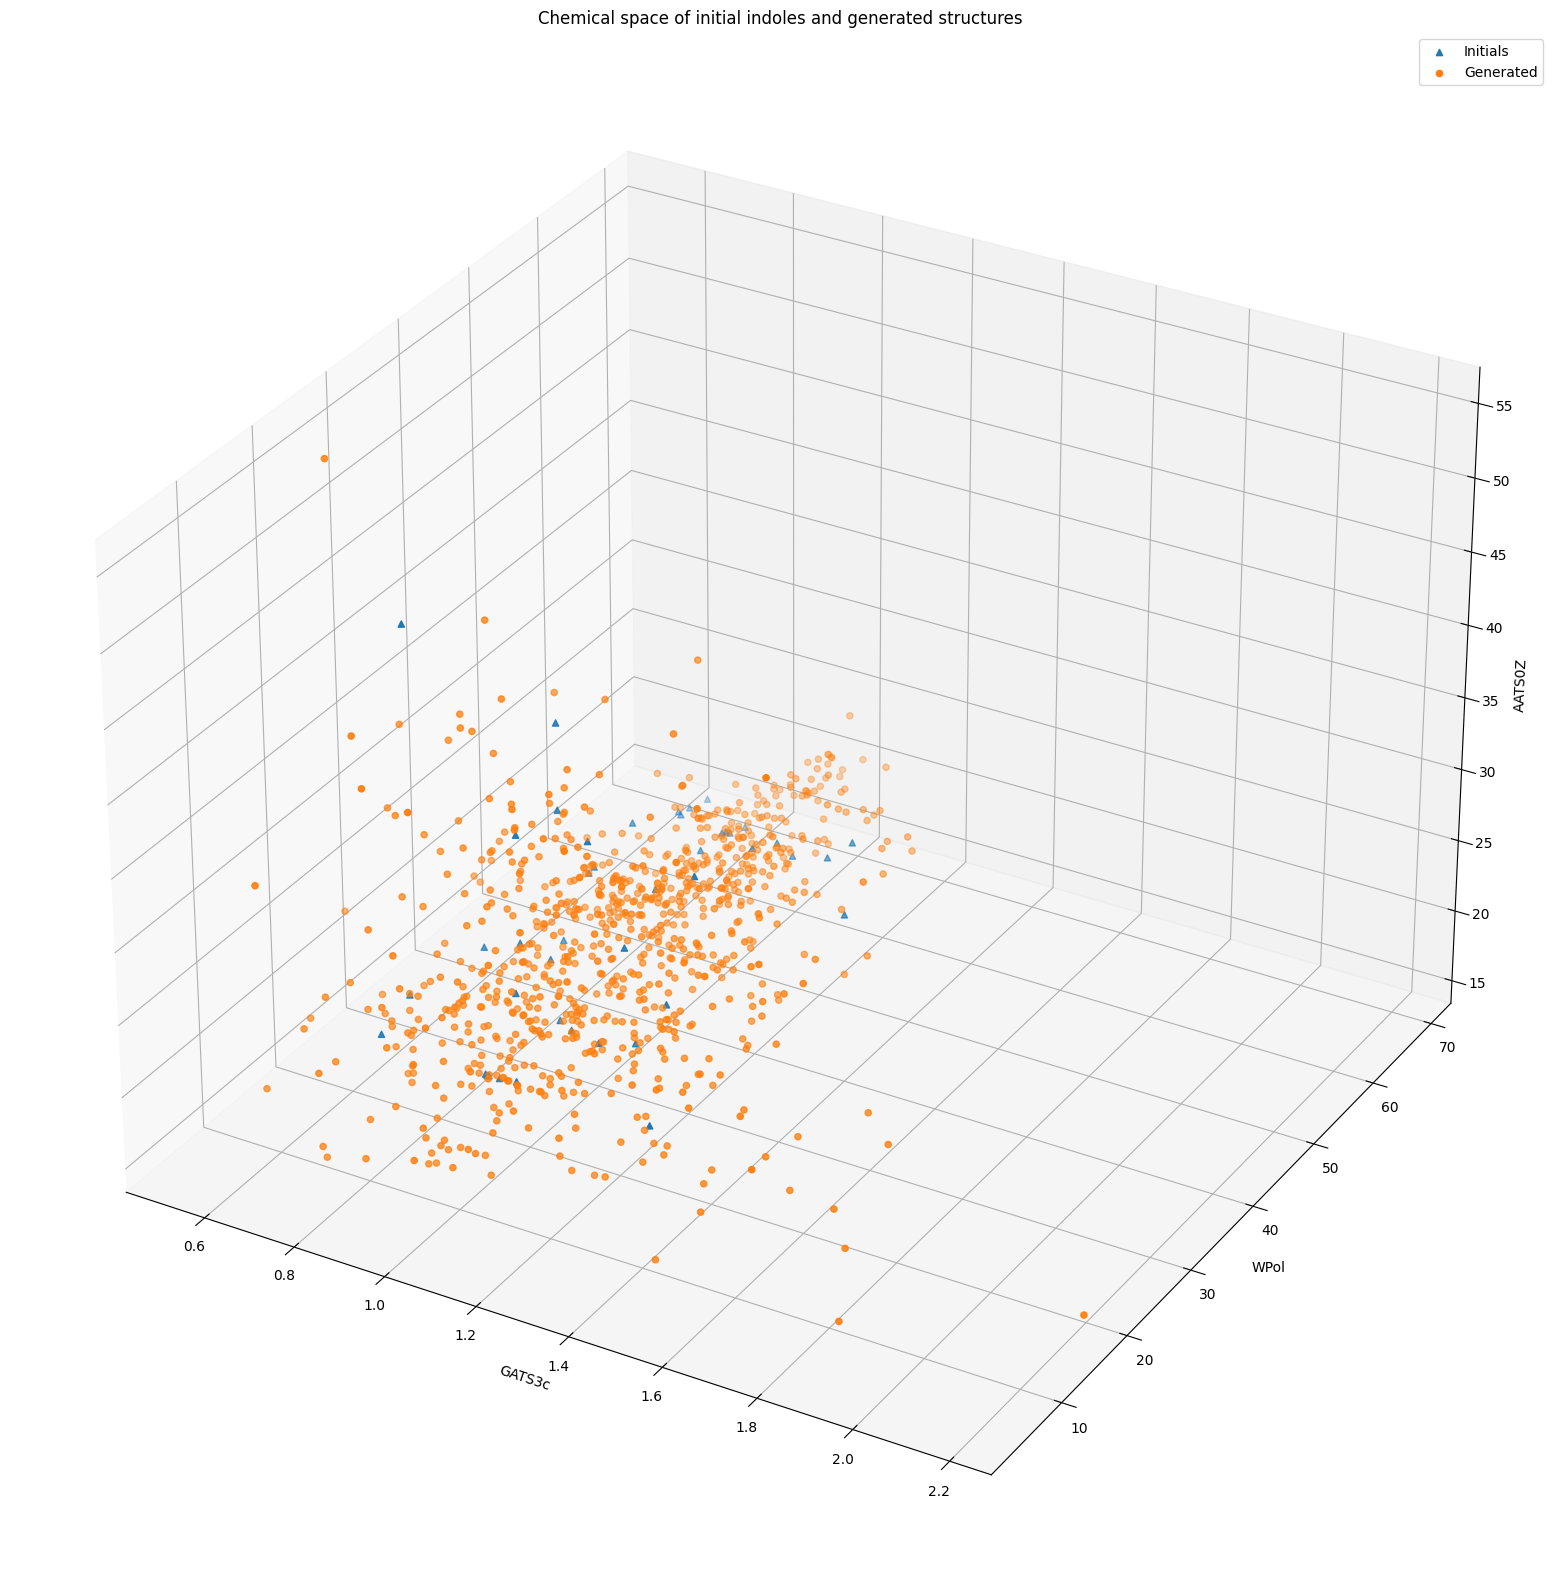

In [33]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')

ax.scatter(molecular_descriptors_initials[descriptor1], molecular_descriptors_initials[descriptor2], molecular_descriptors_initials[descriptor3], marker='^')
ax.scatter(molecular_descriptors_generated[descriptor1], molecular_descriptors_generated[descriptor2], molecular_descriptors_generated[descriptor3], marker='o')
ax.legend(['Initials', 'Generated'])
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel(descriptor1)
ax.set_ylabel(descriptor2)
ax.set_zlabel(descriptor3)
plt.xlim([whole_set_descriptor1.min(), whole_set_descriptor1.max()])
plt.ylim([whole_set_descriptor2.min(), whole_set_descriptor2.max()])
ax.set_zlim([whole_set_descriptor3.min(), whole_set_descriptor3.max()])
plt.show()

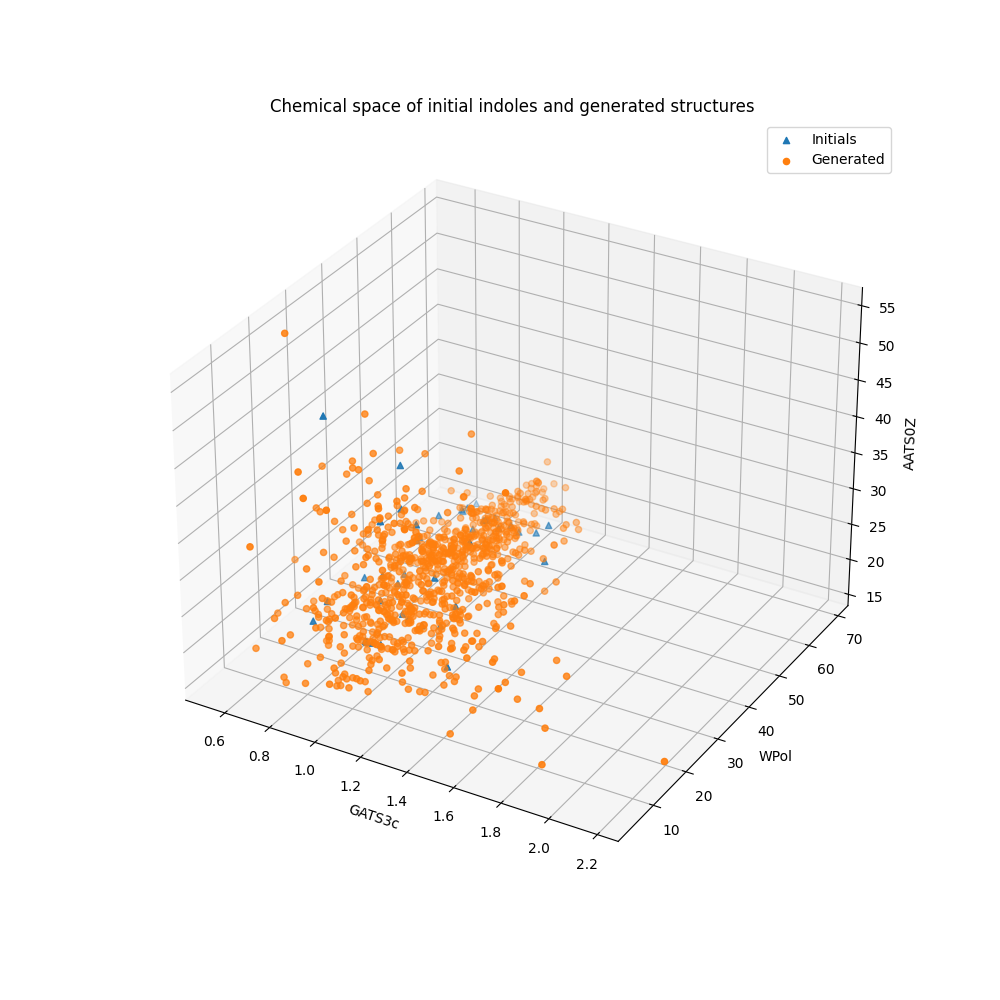

In [34]:
#%matplotlib
%matplotlib widget
#%matplotlib notebook
fig2 = plt.figure(figsize=(10, 10))
ax = fig2.add_subplot(projection='3d')

ax.scatter(molecular_descriptors_initials[descriptor1], molecular_descriptors_initials[descriptor2], molecular_descriptors_initials[descriptor3], marker='^')
ax.scatter(molecular_descriptors_generated[descriptor1], molecular_descriptors_generated[descriptor2], molecular_descriptors_generated[descriptor3], marker='o')
ax.legend(['Initials', 'Generated'])
ax.set_title('Chemical space of initial caffeines and generated structures')
ax.set_xlabel(descriptor1)
ax.set_ylabel(descriptor2)
ax.set_zlabel(descriptor3)
plt.xlim([whole_set_descriptor1.min(), whole_set_descriptor1.max()])
plt.ylim([whole_set_descriptor2.min(), whole_set_descriptor2.max()])
ax.set_zlim([whole_set_descriptor3.min(), whole_set_descriptor3.max()])

#plt.show()
plt.ion()
plt.savefig("Caffeine_chemical_space.svg")
#plt.savefig("Indole_chemical_space.pdf")

In [35]:
## creation of 3D graphs in *svg format for each azimuth
create_pictures_to_movie = 0
if create_pictures_to_movie == 1:
    for ii in range(0,360,1):
        ax.view_init(elev=10., azim=ii)
        plt.savefig("chemical_space/movie%d.svg" % ii)
else:
    pass

## Save used descriptors to excel file

In [36]:
initial_strcutures = pd.DataFrame(data=molecular_descriptors_initials[descriptor1], columns=[descriptor1])

In [37]:
initial_strcutures.head()

,GATS3c
0,0.899991
1,0.958564
2,0.958389
3,0.900498
4,0.968421


In [38]:
initial_strcutures[descriptor2] = molecular_descriptors_initials[descriptor2]
initial_strcutures[descriptor3] = molecular_descriptors_initials[descriptor3]
initial_strcutures['smiles'] = initial

In [39]:
initial_strcutures.head()

,GATS3c,WPol,AATS0Z,smiles
0,0.899991,31,37.437500,S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4S1
1,0.958564,21,23.360000,OCC1=CN(C(C)=O)C2=CC=CC=C21
2,0.958389,17,19.310345,CCCOCC1=CNC2=CC=CC=C21
3,0.900498,31,31.437500,S=C1N(CC2=CNC3=CC=CC=C32)C(C=CC=C4)=C4O1
4,0.968421,52,22.029851,O=C(C(C=CC=C1)=C1C2=O)N2CCCCCCCCN3N=NC(COCC4=C...


In [40]:
initial_strcutures.to_excel('../Data/Initial_caffeine_mol_desc.xlsx')

In [41]:
generated_strcutures = pd.DataFrame(data=molecular_descriptors_generated[descriptor1], columns=[descriptor1])

In [42]:
generated_strcutures[descriptor2] = molecular_descriptors_generated[descriptor2]
generated_strcutures[descriptor3] = molecular_descriptors_generated[descriptor3]
generated_strcutures['smiles'] = generated_smiles

In [43]:
generated_strcutures.head()

,GATS3c,WPol,AATS0Z,smiles
0,1.297990,23,21.290323,CCOCc1cn(C(C)=O)c2ccccc12
1,1.307551,29,22.971429,CC(=O)n1cc(COc2ccccc2)c2ccccc21
2,1.110904,21,20.666667,C=C(C)n1cc(CO)c2ccccc21
3,0.990894,22,22.214286,CC(=O)n1cc(CCO)c2ccccc21
4,1.044761,24,19.866667,c1ccc2c(c1)c1cn2CCCCOC1


In [44]:
generated_strcutures.to_excel('../Data/generated_caffeines.xlsx')

## Choose the generated structures that are the most similar to the initial structure

In [45]:
def takeClosest(descriptor_1, descriptor_1_collection, descriptor_2, descriptor_2_collection, descriptor_3, descriptor_3_collection):
    average_picked = (descriptor_1+descriptor_2+descriptor_3)/3
    val = range(len(generated_strcutures[descriptor1]))
    dfc = pd.DataFrame(data=val, columns=['Number'])
    val_ = []
    for i in range(len(descriptor_1_collection)):
        average_ = (descriptor_1_collection[i]+descriptor_2_collection[i]+descriptor_3_collection[i])/3
        val_.append(average_)
    dfc['Average'] = val_
    
    closest_val = min(dfc['Average'], key=lambda x:abs(x-average_picked))
    
    closest_value_df =  dfc.loc[(dfc['Average'] == closest_val)]
    
    dfc = dfc.loc[dfc['Average'] != closest_val]
    
    closest_val_ = min(dfc['Average'], key=lambda x:abs(x-average_picked))
    
    closest_value_df_ =  dfc.loc[(dfc['Average'] == closest_val_)]
    
    dfc = dfc.loc[dfc['Average'] != closest_val_]
    
    closest_val__ = min(dfc['Average'], key=lambda x:abs(x-average_picked))
    
    closest_value_df__ =  dfc.loc[(dfc['Average'] == closest_val__)]
    
    closest_value_df_combined = pd.concat([closest_value_df, closest_value_df_, closest_value_df__], ignore_index=True)
    
    return closest_value_df_combined

In [46]:
selected_structure_ = int(input("Please write down the integer from 0 to 44 down here: ")) #29
descriptor_1_picked = molecular_descriptors_initials[descriptor1][selected_structure_]
descriptor_2_picked = molecular_descriptors_initials[descriptor2][selected_structure_]
descriptor_3_picked = molecular_descriptors_initials[descriptor3][selected_structure_]

Please write down the integer from 0 to 44 down here: 29


In [47]:
numbers_of_structures = takeClosest(descriptor_1_picked, molecular_descriptors_generated[descriptor1],
                                   descriptor_2_picked, molecular_descriptors_generated[descriptor2],
                                   descriptor_3_picked, molecular_descriptors_generated[descriptor3])

In [48]:
numbers_of_structures

,Number,Average
0,327,14.965973
1,743,14.967123
2,267,14.937850


In [49]:
numbers_of_structures["Number"][0]

327

In [50]:
picked_average = (descriptor_1_picked+descriptor_2_picked+descriptor_3_picked)/3
picked_average

14.954083728651222

In [51]:
descriptor_1_cloeset = molecular_descriptors_generated[descriptor1][numbers_of_structures['Number'][0:]]
descriptor_2_closest = molecular_descriptors_generated[descriptor2][numbers_of_structures['Number'][0:]]
descriptor_3_closed = molecular_descriptors_generated[descriptor3][numbers_of_structures['Number'][0:]]

In [52]:
print('PICKED descriptors:')
print(descriptor_1_picked)
print(descriptor_2_picked)
print(descriptor_3_picked)
print('Closest descriptors:')
print(descriptor_1_cloeset)
print(descriptor_2_closest)
print(descriptor_3_closed)

PICKED descriptors:
1.0497511859536697
23
20.8125
Closest descriptors:
327    0.703474
743    1.276369
267    0.884977
Name: GATS3c, dtype: float64
327    24
743    21
267    21
Name: WPol, dtype: int64
327    20.194444
743    22.625000
267    22.928571
Name: AATS0Z, dtype: float64


In [53]:
picked_structure = initial_strcutures.loc[(initial_strcutures[descriptor1] == descriptor_1_picked) & (initial_strcutures[descriptor2] == descriptor_2_picked) & (initial_strcutures[descriptor3] == descriptor_3_picked)]

In [54]:
picked_structure

,GATS3c,WPol,AATS0Z,smiles
29,1.049751,23,20.8125,CCC1=NC=CN1CC2=CNC3=CC=CC=C32


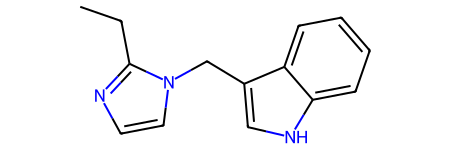

In [55]:
Chem.MolFromSmiles(picked_structure['smiles'][selected_structure_])

In [56]:
descriptor_1_cloeset[numbers_of_structures["Number"][0]]

0.7034736443522129

In [57]:
closest_gen_stru = pd.DataFrame()
for ithem in range(len(descriptor_1_cloeset)):
    df_res = generated_strcutures.loc[(generated_strcutures[descriptor1] == descriptor_1_cloeset[numbers_of_structures["Number"][ithem]]) 
                                            & (generated_strcutures[descriptor2] == descriptor_2_closest[numbers_of_structures["Number"][ithem]]) 
                                            & (generated_strcutures[descriptor3] == descriptor_3_closed[numbers_of_structures["Number"][ithem]])]
    closest_gen_stru=closest_gen_stru.append(df_res)

C:\Users\aleks\AppData\Local\Temp\ipykernel_23244\2947859290.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_gen_stru=closest_gen_stru.append(df_res)
C:\Users\aleks\AppData\Local\Temp\ipykernel_23244\2947859290.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_gen_stru=closest_gen_stru.append(df_res)
C:\Users\aleks\AppData\Local\Temp\ipykernel_23244\2947859290.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_gen_stru=closest_gen_stru.append(df_res)


In [58]:
closest_gen_stru

,GATS3c,WPol,AATS0Z,smiles
327,0.703474,24,20.194444,C=CC=CC=CC(=C[NH])Cc1c[nH]c2ccccc12
743,1.276369,21,22.625000,C=C(COC(C)=O)c1ccccc1NC(C)=O
267,0.884977,21,22.928571,O=C1C=CCN1Cc1c[nH]c2ccccc12


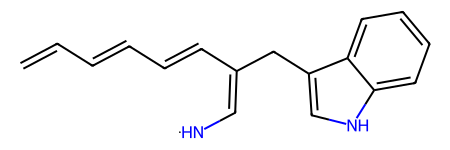

In [59]:
Chem.MolFromSmiles(closest_gen_stru['smiles'][int(numbers_of_structures['Number'][0])])

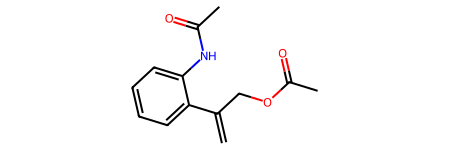

In [60]:
Chem.MolFromSmiles(closest_gen_stru['smiles'][int(numbers_of_structures['Number'][1])])

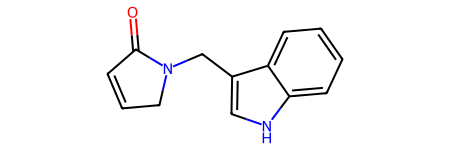

In [61]:
Chem.MolFromSmiles(closest_gen_stru['smiles'][int(numbers_of_structures['Number'][2])])

## Search within a box

In [62]:
center_of_a_box = [descriptor_1_picked, descriptor_2_picked, descriptor_3_picked]

In [63]:
size_of_a_box = [descriptor_1_picked/2, descriptor_2_picked/2, descriptor_3_picked/2]

In [64]:
def create_a_box_to_search_within(center_of_a_box, size_of_a_box):
    chemical_space_descriptor_1 = [center_of_a_box[0]-size_of_a_box[0], center_of_a_box[0]+size_of_a_box[0]]
    chemical_space_descriptor_2 = [center_of_a_box[1]-size_of_a_box[1], center_of_a_box[1]+size_of_a_box[1]]
    chemical_space_descriptor_3 = [center_of_a_box[2]-size_of_a_box[2], center_of_a_box[2]+size_of_a_box[2]]
    return chemical_space_descriptor_1, chemical_space_descriptor_2, chemical_space_descriptor_3

In [65]:
chemical_space_descriptor_1, chemical_space_descriptor_2, chemical_space_descriptor_3 = create_a_box_to_search_within(center_of_a_box, size_of_a_box) 

In [66]:
chemical_space_descriptor_1

[0.5248755929768348, 1.5746267789305044]

In [67]:
chemical_space_descriptor_2

[11.5, 34.5]

In [68]:
chemical_space_descriptor_3

[10.40625, 31.21875]

In [69]:
selected_structures = generated_strcutures.loc[(generated_strcutures[descriptor1] >= chemical_space_descriptor_1[0]) 
                                               & (generated_strcutures[descriptor1] <= chemical_space_descriptor_1[1]) 
                                               & (generated_strcutures[descriptor2] >= chemical_space_descriptor_2[0]) 
                                               & (generated_strcutures[descriptor2] <= chemical_space_descriptor_2[1]) 
                                               & (generated_strcutures[descriptor3] >= chemical_space_descriptor_3[0]) 
                                               & (generated_strcutures[descriptor3] >= chemical_space_descriptor_3[1])]

In [70]:
selected_structures

,GATS3c,WPol,AATS0Z,smiles
198,0.913967,31,31.290323,O=c1c(=S)ccccn1Cc1c[nH]c2ccccc12
208,0.857427,22,40.000000,CN(Cc1c[nH]c2ccccc12)C(Cl)=CCl
220,0.876711,23,35.212121,S=CC(=CCl)CNCCc1c[nH]c2ccccc12
229,0.978381,20,35.200000,CCNC(=S)SCc1c[nH]c2ccccc12
235,0.831887,22,40.000000,Cc1cccc2c(CNC(Cl)=CCl)c[nH]c12
245,0.891856,24,41.714286,N=CN(Cc1c[nH]c2ccccc12)C(Cl)=CCl
253,0.714658,20,33.769231,Clc1cn(Cc2c[nH]c3ccccc23)cn1
260,0.847994,21,32.370370,O=C1N[SH]=CN1Cc1c[nH]c2ccccc12
269,0.916195,31,31.437500,O=c1sc2ccccc2n1Cc1c[nH]c2ccccc12
277,0.876112,26,35.176471,Cc1cccc2c(CCN(C)C(Cl)=CCl)c[nH]c12


In [71]:
print("Picked initial structure: "+ str(descriptor1) + ' ' + str(descriptor_1_picked), str(descriptor2) + ' ' + str(descriptor_2_picked), str(descriptor3) + ' ' + str(descriptor_3_picked))

Picked initial structure: GATS3c 1.0497511859536697 WPol 23 AATS0Z 20.8125


In [72]:
mols = [Chem.MolFromSmiles(smi) for smi in selected_structures['smiles']]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:258: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


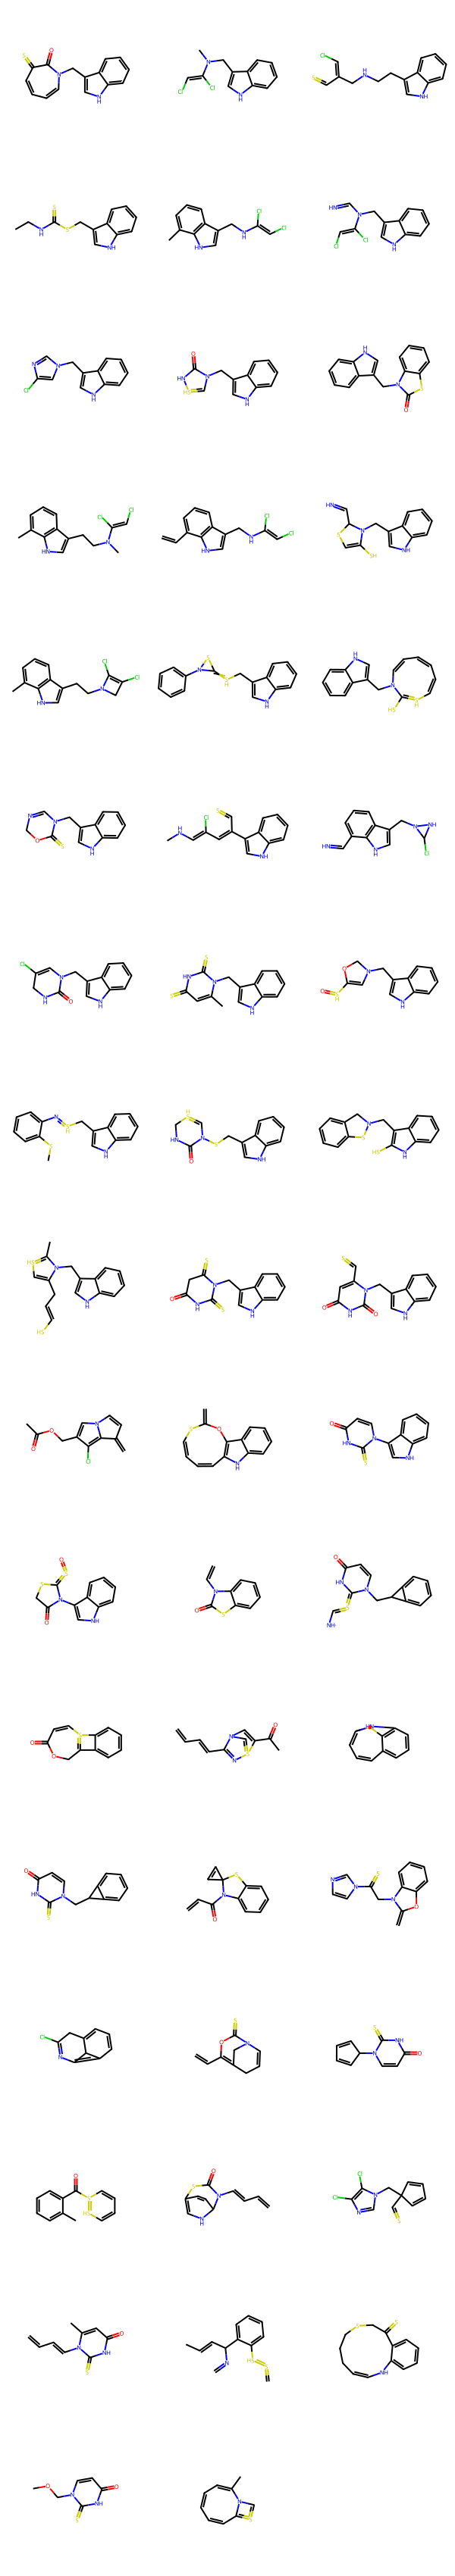

In [73]:
Chem.Draw.MolsToGridImage(mols)